In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('sales_data_sample.csv',encoding='ISO-8859-1')



In [6]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
data = data[['ORDERLINENUMBER', 'SALES']]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERLINENUMBER  2823 non-null   int64  
 1   SALES            2823 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 44.2 KB


In [12]:
data.isna().sum()

ORDERLINENUMBER    0
SALES              0
dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(data.values)


In [19]:
scaled_values

array([[-1.05705871, -0.37082523],
       [-0.34701507, -0.42789707],
       [-1.05705871,  0.17944282],
       ...,
       [-0.58369628,  1.01202368],
       [-1.29373992, -0.78072155],
       [ 0.59970978, -0.25763729]])

In [24]:
from sklearn.cluster import KMeans
wcss=[]




In [25]:

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

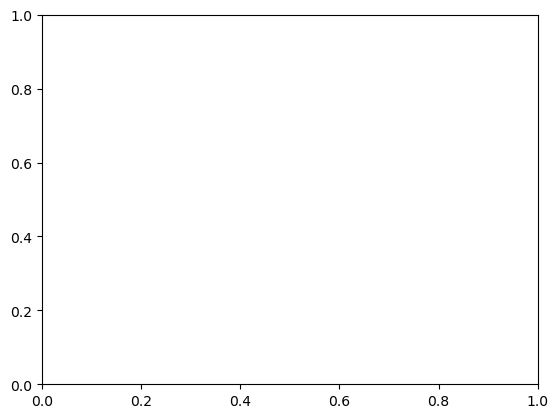

In [26]:
# Plot the Elbow Plot
import matplotlib.pyplot as plt

plt.plot(range(1,11),wcss,'ro-')
plt.show()

In [ ]:
 Select relevant numerical columns for clustering
# Replace 'Column1', 'Column2', etc. with actual column names after inspecting the dataset
selected_data = data[['Column1', 'Column2', 'Column3']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose the optimal K (e.g., where the elbow occurs) and apply K-Means
optimal_k = 3  # Replace with the chosen number of clusters from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# View the clustered data
print(data.head())
